In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
pd.options.display.max_rows = None

In [6]:
data = pd.read_csv("./csv/gtfs_realtime.csv")

In [7]:
data.head()

,trip_id,vehicle_id,instant,longitude,latitude,startdate,starttime,directionId
0,0#3625-21,192,1663095702,12.455182,41.884422,20220913,20:51:00,0
1,0#725-34,194,1663085102,12.408945,41.834470,20220913,21:00:00,1
2,0#726-34,196,1663095716,12.350500,41.874340,20220913,21:00:00,0
3,0#796-9,198,1663095722,12.461082,41.887215,20220913,20:55:00,0
4,0#725-34,199,1663095710,12.384956,41.886276,20220913,21:00:00,1


In [8]:
data["vehicle_id"].nunique()

3768

In [20]:
data["vehicle_id"].value_counts()

2931           84
2977           83
4528           81
4035           81
4127           80
               ..
9590_000005     1
9614_000013     1
350_000005      1
9567_000004     1
9837_000010     1
Name: vehicle_id, Length: 3768, dtype: int64

In [23]:
data_test = data[data["vehicle_id"]=="2931"]

In [24]:
data_test

,trip_id,vehicle_id,instant,longitude,latitude,startdate,starttime,directionId
222,0#3693-25,2931,1663095718,12.465627,41.900078,20220913,20:56:00,1
1011,0#3693-25,2931,1663096648,12.422677,41.888725,20220913,20:56:00,1
1757,0#3693-25,2931,1663096928,12.415506,41.877280,20220913,20:56:00,1
2493,0#3693-26,2931,1663097424,12.410532,41.866690,20220913,21:41:00,0
3212,0#3693-26,2931,1663098106,12.412825,41.873500,20220913,21:41:00,0
...,...,...,...,...,...,...,...,...
65851,0#3693-14,2931,1663240764,12.414322,41.875610,20220915,13:19:00,0
66880,0#3693-14,2931,1663241692,12.437050,41.893920,20220915,13:19:00,0
68927,0#3693-15,2931,1663242902,12.463190,41.901030,20220915,14:04:00,1
69949,0#3693-16,2931,1663245444,12.410521,41.866726,20220915,14:43:00,0


In [29]:
data_test=data_test.sort_values(by="instant")

In [30]:
data_test

,trip_id,vehicle_id,instant,longitude,latitude,startdate,starttime,directionId
222,0#3693-25,2931,1663095718,12.465627,41.900078,20220913,20:56:00,1
1011,0#3693-25,2931,1663096648,12.422677,41.888725,20220913,20:56:00,1
1757,0#3693-25,2931,1663096928,12.415506,41.877280,20220913,20:56:00,1
2493,0#3693-26,2931,1663097424,12.410532,41.866690,20220913,21:41:00,0
3212,0#3693-26,2931,1663098106,12.412825,41.873500,20220913,21:41:00,0
...,...,...,...,...,...,...,...,...
65851,0#3693-14,2931,1663240764,12.414322,41.875610,20220915,13:19:00,0
66880,0#3693-14,2931,1663241692,12.437050,41.893920,20220915,13:19:00,0
68927,0#3693-15,2931,1663242902,12.463190,41.901030,20220915,14:04:00,1
69949,0#3693-16,2931,1663245444,12.410521,41.866726,20220915,14:43:00,0


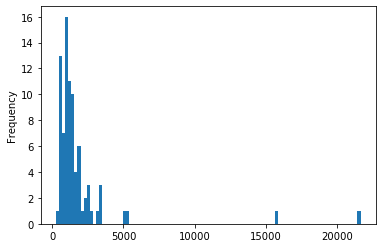

In [35]:
data_test["instant"].diff().plot(kind="hist",bins=100)

In [38]:
timestamps = data_test["instant"].diff()

In [39]:
timestamps[timestamps <= 1000]

1011     930.0
1757     280.0
2493     496.0
3212     682.0
3902     526.0
4557     962.0
5790     992.0
6369     528.0
7964     744.0
8468     558.0
9354     620.0
15586    682.0
20500    804.0
23294    838.0
26054    774.0
31764    900.0
38633    588.0
41854    990.0
42554    776.0
43210    526.0
43864    992.0
45077    960.0
45638    528.0
46693    930.0
47185    744.0
47653    558.0
55135    930.0
60604    994.0
61668    526.0
64819    528.0
66880    928.0
Name: instant, dtype: float64

In [43]:
# Finding the differences b.w timestamps groupped by vehicle ids
min_diff = data.groupby("vehicle_id")["instant"].apply(lambda x: x.sort_values().diff().min()).dropna().sort_values()

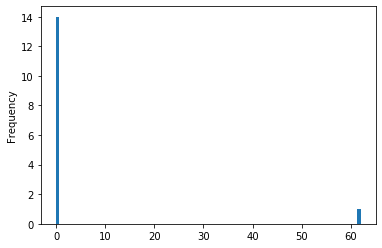

In [62]:
min_diff[min_diff <= 100].plot(kind="hist",bins=100)

In [81]:
min_diff.value_counts().sort_values(ascending=False).head(5)

310.0    201
528.0    187
526.0    134
280.0     93
530.0     89
Name: instant, dtype: int64

In [63]:
data.head()

,trip_id,vehicle_id,instant,longitude,latitude,startdate,starttime,directionId
0,0#3625-21,192,1663095702,12.455182,41.884422,20220913,20:51:00,0
1,0#725-34,194,1663085102,12.408945,41.834470,20220913,21:00:00,1
2,0#726-34,196,1663095716,12.350500,41.874340,20220913,21:00:00,0
3,0#796-9,198,1663095722,12.461082,41.887215,20220913,20:55:00,0
4,0#725-34,199,1663095710,12.384956,41.886276,20220913,21:00:00,1


In [77]:
# Adding the time difference to consective readings and setting -ve values to 0 because the two rows where vehicle id
# switches is -ve
data["diff"] = data.sort_values(by=["vehicle_id","instant"])["instant"].diff().apply(lambda x: x if x > 0 else 0)

In [79]:
data.sort_values(by=["vehicle_id","instant"]).head(5)

,trip_id,vehicle_id,instant,longitude,latitude,startdate,starttime,directionId,diff
49766,VJdc4aa81ee006a1939c9815372d14f2181e9dace5,106_000003,1663214419,12.704830,41.865475,20220915,06:00:00,0,0.0
50884,VJ48723be2aeb2a454c26d9320f4be2211b4632ce2,106_000004,1663219801,12.701127,41.865265,20220915,06:20:00,0,5382.0
52151,VJ2b22dd340fe17f4f74d4cfe3f5c57c68f3f9ae66,106_000005,1663223180,12.651852,41.912230,20220915,07:45:00,1,3379.0
53605,VJf1afd4f394f80e2f4fef9c23dd27542d0e59531a,106_000006,1663225520,12.686636,41.890217,20220915,08:29:00,0,2340.0
54689,VJ38124d5b67087d0d70bcb16c562c9b083b8d41ee,106_000007,1663227501,12.689409,41.863102,20220915,09:25:00,0,1981.0
